Modell Abgabe 4

**Earth**

    - Relative position of earth to Sun
    - Mass of earth
    - Earths speed at this moment

In [1]:
earthPos = [149.6 * 10 ** 9, 0, 0]
earthMass = 5.972 * 10 ** 24
earthSpeed = [0, -29.78 * 10 ** 3, 0]

**Sun**
    
    - Relative position of sun to earth
    - Mass of Sun

In [2]:
sunPos = [0, 0, 0]
sunMass = 1.989 * 10 ** 30

**Gravitational power**

In [3]:
G = 6.672 * 10 ** -11

**Delta time (t) for calculating waypoints**

In [4]:
tDelta = 60 * 60

**Calculations**

**Directional distance sun - earth**

earthToSun = sunPos - earthPos

**Euklydical distance sun - earth**

distance = (x^2 + y^2 + z^2)**0.5

**Gravitational power with mass center sun - earth**

power = G * earthMass * sunMass / distance^3 * (sunPos - earthPos)

**Directional acceleration of earth**

acceleration = g / earthMass for every object in power

**Directional speed for delta time**

earthSpeed = earthSpeed + acceleration of delta time

**Positional vector of earth dependent on delta time**

earthPos = earthPos + acceleration / delta time + acceleration / delta time ^2 * 2

In [7]:
 def berechnungen():
    global earthPos
    global earthSpeed
    earthToSun = list(map(lambda x, y: x - y, sunPos, earthPos))
    distance = sum(x ** 2 for x in earthToSun)**.5
    power = [G * earthMass * sunMass / distance ** 3 * x for x in earthToSun]
    acceleration = [g / earthMass for g in power]
    earthPos = list(map(lambda x, y, z: x + y * tDelta + z * (tDelta ** 2) / 2, 
                              earthPos, earthSpeed, acceleration))
    earthSpeed = list(map(lambda v, a: v + a * tDelta, earthSpeed, acceleration))
    return earthPos

**Displaying of a roundabout for sun which takes about one year**   
   
    - 1 year, tDelta is one hour, so we need to calculate 365*24 positions
    - This lot of positions will be saved into a list to save them for grafic
    - The easiest tool here to display this will be the matplotlib

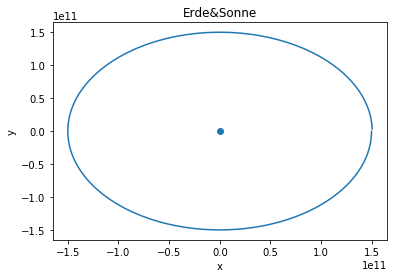

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

positions = [berechnungen() for x in range(365 * 24)]

plt.title('Erde&Sonne')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(sunPos[0], sunPos[1])
plt.plot([p[0] for p in positions], [p[1] for p in positions])
plt.show()